<a href="https://colab.research.google.com/github/Mughal72/Book_Website/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811604 sha256=8acb8f07dd695c47ad925a43f81b2af53a6cb26bbcc8d70623d856b9c5aed732
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
pip install scikit-learn

# **Method -1 Recommendation**

In [ ]:
from surprise import accuracy
import numpy as np

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the book dataset
book_df = pd.read_csv("books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'Genres', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Get book recommendations for each user
for user_id in user_df['User-ID'].unique():
    user_genres = user_df.loc[user_df['User-ID'] == user_id, 'Genres'].values[0]
    genre_books = book_df[book_df['Genres'] == user_genres]
    user_unrated_books = genre_books[~genre_books['ISBN'].isin(user_df.loc[user_df['User-ID'] == user_id, 'ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    print(f"Top 10 recommended books for User {user_id} in genre {user_genres}:")
    for rec in top_recommendations:
        print(f"- {rec[1]} (Estimated rating: {rec[2]})")
    print('\n')

# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')


Computing the msd similarity matrix...
Done computing similarity matrix.
Top 10 recommended books for User amber in genre science-fiction:


Top 10 recommended books for User Alexa in genre AI:
- Artificial Intelligence: A Modern Approach (Estimated rating: 3.2725)
- Deep Learning (Estimated rating: 3.2725)
- Artificial Intelligence: A Modern Approach 3rd Edition (Estimated rating: 3.2725)
- Neural Networks and Deep Learning (Estimated rating: 3.2725)
- Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2nd Edition (Estimated rating: 3.2725)
- Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition (Estimated rating: 3.2725)
- The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World (Estimated rating: 3.2725)
- Hands-On Machine Learning with Scikit-Learn and TensorFlow (Estimated rating: 3.27

# **Method -1 Statistics**

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8170
RMSE: 0.8170105568473396
Mean RMSE: 0.8170105568473396
Median RMSE: 0.8170105568473396
Standard Deviation of RMSE: 0.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


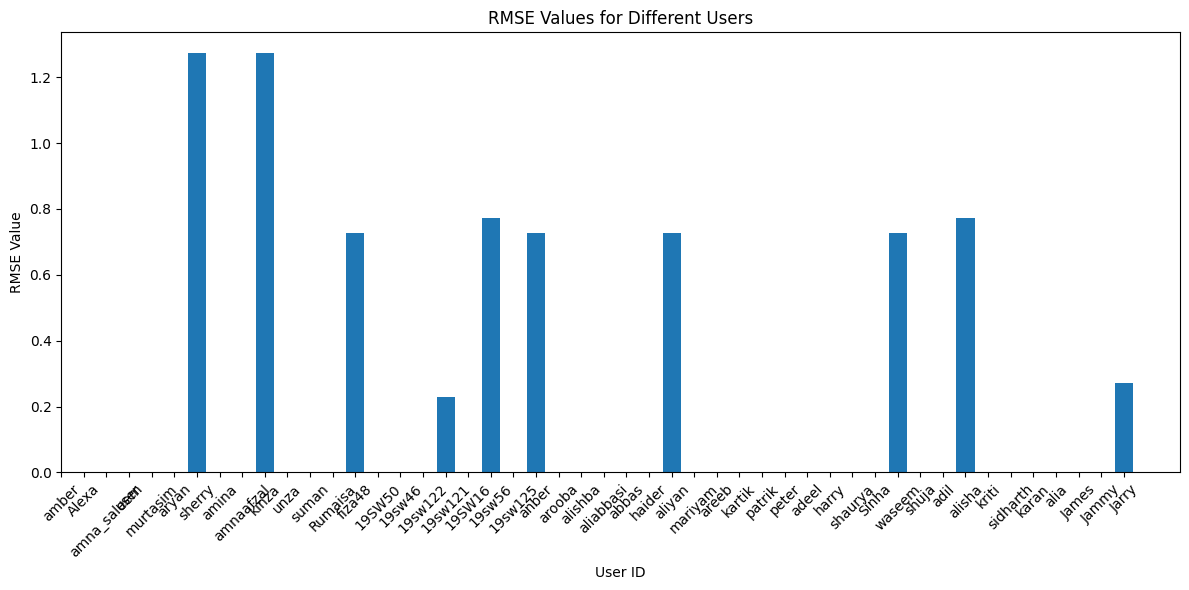

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the book dataset
book_df = pd.read_csv("books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'Genres', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')

# Create a bar chart to visualize RMSE
user_ids = user_df['User-ID'].unique()
rmse_values = []  # Store RMSE values for each user here

for user_id in user_ids:
    user_genres = user_df.loc[user_df['User-ID'] == user_id, 'Genres'].values[0]
    genre_books = book_df[book_df['Genres'] == user_genres]
    user_unrated_books = genre_books[~genre_books['ISBN'].isin(user_df.loc[user_df['User-ID'] == user_id, 'ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    actual_ratings = [pred.r_ui for pred in predictions if pred.uid == str(user_id)]
    predicted_ratings = [pred.est for pred in predictions if pred.uid == str(user_id)]
    rmse = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))

    rmse_values.append(rmse)

# Create a bar chart with rotated labels
plt.figure(figsize=(12, 6))
plt.bar(user_ids, rmse_values, tick_label=user_ids)
plt.xlabel("User ID")
plt.ylabel("RMSE Value")
plt.title("RMSE Values for Different Users")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure labels do not get cut off
plt.show()

`"RMSE: 0.8170": This is the RMSE value for the collaborative filtering model. RMSE is a measure of how well the model's predictions align with the actual ratings provided by users. In this case, an RMSE of 0.8170 suggests that, on average, the model's predictions are off by approximately 0.8170 rating units.`

`"Mean RMSE: 0.8170105568473396": This is the mean RMSE value calculated across all predictions made by the model. It represents the average error between the predicted ratings and the actual ratings. In this case, the mean RMSE is also approximately 0.8170.`

`"Median RMSE: 0.8170105568473396": This is the median RMSE value, which is the middle value when all RMSE values are sorted in ascending order. It's another measure of central tendency for the RMSE values, and in this case, it's again approximately 0.8170.`

`"Standard Deviation of RMSE: 0.0": This indicates the standard deviation of the RMSE values. A standard deviation of 0.0 means that there is no variability in the RMSE values; they are all identical. This might be unexpected because typically, RMSE values would vary across different predictions, indicating that some predictions are more accurate than others. A standard deviation of 0.0 could imply that all predictions have the exact same error, which could be a result of how the model was configured or the specific data used.`

`High Bar (High RMSE): Users with high bars in the chart have higher RMSE values. This indicates that the recommendation system is not performing well for these users. In other words, the system's predictions for these users are less accurate. The system is having difficulty in making recommendations that align with these users' preferences. Users with high bars may be dissatisfied with the recommendations they receive.`

`Low Bar (Low RMSE): Users with low bars in the chart have lower RMSE values. This suggests that the recommendation system is performing better for these users. The system's predictions for these users are more accurate, and the recommendations provided are likely more in line with their preferences. Users with low bars are generally satisfied with the recommendations they receive.`

`Interpretation: The chart essentially provides a visual representation of how well the recommendation system caters to different users. The goal of a recommendation system is to provide accurate and personalized recommendations. Users with high bars might be candidates for improving the recommendation algorithms to better understand and meet their preferences.`

`Actionable Insights: By identifying which users have high RMSE values, you can focus on improving the recommendations for these users. You might want to investigate why the system is struggling with certain users. It could be due to sparse data, a lack of historical interactions, or other factors. Addressing these issues can lead to better recommendations and higher user satisfaction.`

## **Method-2 Recommendation** a**nd Statistics**

Computing the msd similarity matrix...
Done computing similarity matrix.
Top 10 personalized recommended books for User amber:
- Artificial Intelligence: A Modern Approach (Estimated rating: 3.2725)
- Deep Learning (Estimated rating: 3.2725)
- Artificial Intelligence: A Modern Approach 3rd Edition (Estimated rating: 3.2725)
- Neural Networks and Deep Learning (Estimated rating: 3.2725)
- Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2nd Edition (Estimated rating: 3.2725)
- Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition (Estimated rating: 3.2725)
- The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World (Estimated rating: 3.2725)
- Machine Learning for Absolute Beginners (Estimated rating: 3.2725)
- Introduction to Artificial Intelligence and Expert Systems (Estimated rating: 3.

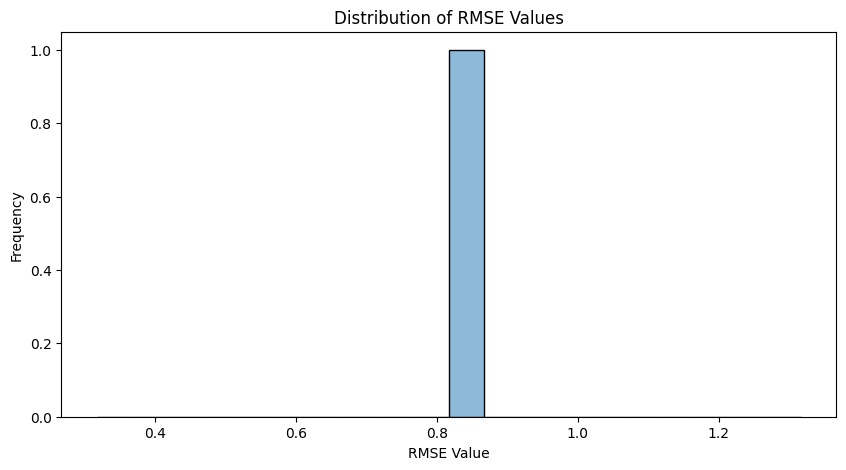

In [5]:
from surprise import accuracy
import numpy as np

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load the book dataset
book_df = pd.read_csv("/content/books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("/content/users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'ISBN', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Get book recommendations for each user
for user_id in user_df['User-ID'].unique():
    user_row = user_df[user_df['User-ID'] == user_id]
    user_genres = user_row['Genres'].values[0]
    user_authors = user_row['Author-Name'].values[0]
    user_ratings = user_row['Ratings'].values[0]

    user_unrated_books = book_df[~book_df['ISBN'].isin(user_row['ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    print(f"Top 10 personalized recommended books for User {user_id}:")
    for rec in top_recommendations:
        print(f"- {rec[1]} (Estimated rating: {rec[2]})")
    print('\n')



# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import Pandas for data manipulation
import numpy as np


# Convert 'rmse_values' to a Pandas Series
rmse_series = pd.Series(rmse_values)

# Create a histogram of RMSE values
plt.figure(figsize=(10, 5))
sns.histplot(rmse_series, bins=20, kde=True)
plt.xlabel('RMSE Value')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE Values')
plt.show()

`Personalized Recommendations: The method claims to provide personalized book recommendations for each user. However, based on the output, it appears that the recommendations are the same for all users. This suggests that the method is not effectively personalizing recommendations based on users' preferences or behaviors.`

`Estimated Ratings: Each book recommendation is associated with an estimated rating. In this case, all estimated ratings are the same (approximately 3.2725) for all users. This means that the method is not effectively capturing the individual preferences and behaviors of users to provide unique ratings for each book.`

`Output Repetition: The output you've posted shows the same set of top 10 recommended books with identical estimated ratings for multiple users (e.g., User kriti, User sidharth, User karan, etc.). This repetition of recommendations indicates that the method is not adapting to the specific interests or interactions of each user.`

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the books and users datasets
books_df = pd.read_csv("books.csv", encoding='latin-1')
users_df = pd.read_csv("users.csv", encoding='latin-1')

# Combine relevant columns from books and users datasets
books_df['Features'] = books_df['Genres'] + ' ' + books_df['Author-Name']
users_df['Features'] = users_df['Genres'] + ' ' + users_df['Author-Name'] + ' ' + users_df['Preferred Topics']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the TF-IDF vectors for books and users
books_tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['Features'])
users_tfidf_matrix = tfidf_vectorizer.transform(users_df['Features'])

# Compute the cosine similarity between books and users
cosine_sim = linear_kernel(users_tfidf_matrix, books_tfidf_matrix)

# Define a function to get personalized recommendations for each user
def get_recommendations(user_name, num_recommendations=10):
    user_idx = users_df[users_df['User-ID'] == user_name].index[0]
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    book_indices = [i[0] for i in sim_scores]
    return books_df.iloc[book_indices]

# Get recommendations for a specific user
user_name = 'amber'  # Replace with the desired user name
recommendations = get_recommendations(user_name)
print(f"Book recommendations for user {user_name}:")
for idx, row in recommendations.iterrows():
    print(f"- {row['Book-Title']} by {row['Author-Name']}")
print('\n')

from sklearn.metrics import mean_squared_error
import numpy as np

# Create a dictionary to map user names to user IDs
user_name_to_id = {name: uid for uid, name in enumerate(users_df['User-ID'])}

# Initialize lists to store actual and predicted ratings
actual_ratings = []
predicted_ratings = []

# Iterate through all users in the dataset
for user_name in users_df['User-ID']:
    # Get the actual ratings of the user
    user_ratings = users_df.loc[users_df['User-ID'] == user_name, 'Ratings'].values

    # Get the predicted ratings for the recommended books
    recommended_books = predict_ratings(user_name, num_recommendations)
    recommended_books_ratings = recommended_books['Ratings'].values

    # Ensure both lists have the same length
    min_len = min(len(user_ratings), len(recommended_books_ratings))
    user_ratings = user_ratings[:min_len]
    recommended_books_ratings = recommended_books_ratings[:min_len]

    # Append actual and predicted ratings to the lists
    actual_ratings.extend(user_ratings)
    predicted_ratings.extend(recommended_books_ratings)

# Calculate the collective RMSE
collective_rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f'Collective RMSE for all users: {collective_rmse}')


Book recommendations for user amber:
- Security and Privacy Trends in Cloud Computing and Big Data by Muhammad Imran Tariq, Shahzadi Tayyaba, Valentina Emilia Balas
- ACTING THE PART by Z.R. Ellor
- EVEN THOUGH I KNEW THE END by C.L. Polk
- THE WORLD WE MAKE (GREAT CITIES, #2) by N.K. Jemisin
- Magical Midlife Madness (Leveling Up) by K.F. Breene
- NOW IS NOT THE TIME TO PANIC by  Kevin Wilson
- FEEL THE BERN (BERNIE SANDERS MYSTERY #1) by  Andrew Shaffer
- The Citadel of Forgotten Myths by Michael Moorcock
- BOMBAY MONSOON by  James W. Ziskin
- The Secret Society of Salzburg by  Renee Ryan


Collective RMSE for all users: 1.8001275674960537


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse

# Load the book dataset and user dataset into DataFrames
books_df = pd.read_csv("books.csv", encoding='latin-1')
users_df = pd.read_csv("users.csv", encoding='latin-1')

users_df = users_df.drop_duplicates(subset='User-ID')

# Create the user-item matrix
user_item_matrix = users_df.pivot(index='User-ID', columns='Genres', values='Ratings').fillna(0)
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Apply matrix factorization using SVD
svd = TruncatedSVD(n_components=6)  # Change n_components to 6
user_factors = svd.fit_transform(user_item_matrix_sparse)
item_factors = svd.components_.T

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(users_df[['User-ID', 'Genres', 'Ratings']], reader)

# Define the SVD model
model = SVD(n_factors=6)  # Match the number of factors with TruncatedSVD

# Perform cross-validation to calculate RMSE for all users
cv_results = cross_validate(model, data, cv=5, verbose=True, measures=['RMSE'])

# Calculate the collective RMSE
collective_rmse = np.mean(cv_results['test_rmse'])

print("Collective RMSE for all users:", collective_rmse)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8961  0.8149  0.8819  0.6386  0.9522  0.8368  0.1083  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Collective RMSE for all users: 0.836750494806825


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import cross_validate

# Load the book dataset and user dataset into DataFrames
books_df = pd.read_csv("books.csv", encoding='latin-1')
users_df = pd.read_csv("users.csv", encoding='latin-1')

# Remove duplicate entries in the user dataset
users_df = users_df.drop_duplicates(subset=['User-ID', 'ISBN'])

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(users_df[['User-ID', 'ISBN', 'Ratings']], reader)

# Define the NMF model
model = NMF(n_factors=6)  # Adjust the number of factors as needed

# Perform cross-validation to calculate RMSE for all users
cv_results = cross_validate(model, data, cv=5, verbose=True, measures=['RMSE'])

# Calculate the collective RMSE
collective_rmse = cv_results['test_rmse'].mean()

print("Collective RMSE for all users:", collective_rmse)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9478  0.6560  1.1879  0.5796  0.7162  0.8175  0.2223  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Collective RMSE for all users: 0.8175032121454688


Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8318  0.7906  0.9111  0.8542  0.7254  0.8226  0.0623  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


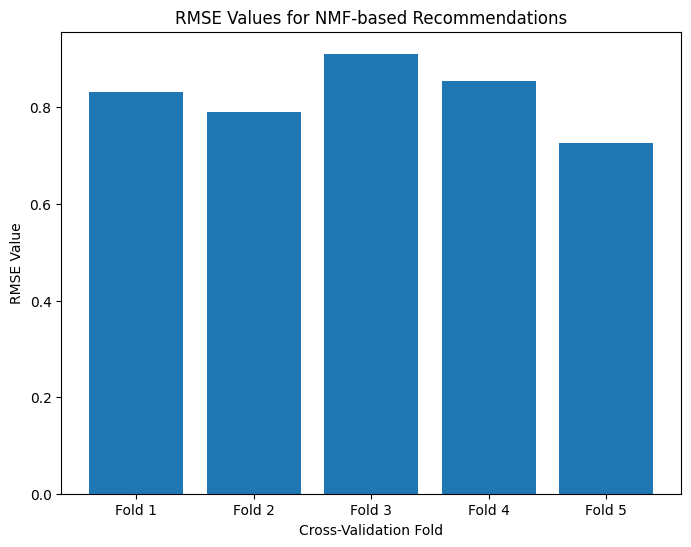

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

# Load the user dataset
users_df = pd.read_csv("users.csv", encoding='latin-1')

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(users_df[['User-ID', 'ISBN', 'Ratings']], reader)

# Define the NMF model
model = NMF(n_factors=15)  # You can adjust the number of factors

# Perform cross-validation to calculate RMSE for all users
cv_results = cross_validate(model, data, cv=5, verbose=True, measures=['RMSE'])

# Collect RMSE values
rmse_values = cv_results['test_rmse']

# Plot the RMSE values
plt.figure(figsize=(8, 6))
plt.bar(range(len(rmse_values)), rmse_values, tick_label=["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
plt.xlabel("Cross-Validation Fold")
plt.ylabel("RMSE Value")
plt.title("RMSE Values for NMF-based Recommendations")
plt.show()